In [2]:
#Machine learning algorithm: Tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import layers
#Multiple Math Functions
from tensorflow import math
from keras.utils.vis_utils import plot_model
#Test if using Tensorflow GPU
if(tf.config.list_physical_devices('GPU')):
    print("Yes")

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df

What is a Tensor? Tensor is a multidimensional array of vectors
The following are tensors:
- [.1, .2, .3] is called a vector
-[1] is called a scalar
-[[1, 2, 3], [4, 5, 6]] is called a matrix
-[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]] is called a tensor

In [4]:
#tensorflow
#Used for deep learning applications, including neural networks, convolutional neural networks, recurrent neural networks, and others.
#A bunch of numbers are used to predict other numbers.
#import the data
nba_data = pd.read_csv( "https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv")
nba_data.head()


,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [ ]:
#Delete Unknown Data
nba_data.isna().sum() #check for missing values
#if there is missimg data
#nba_data = nba_data.dropna()

In [12]:
#Delete Unneeded Data
#Tensorflow only uses numeric data so we can delete the rest
nba_data_numeric = nba_data.copy()
del nba_data_numeric["first_name"]
del nba_data_numeric["last_name"]
del nba_data_numeric["team"]
del nba_data_numeric["pos"]
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [ ]:
#Convert Currency to float (USD)
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return (x)

#apply function to data
nba_data_numeric["salary"] = nba_data_numeric["salary"].apply(clean_currency).astype('float')
nba_data_numeric

In [ ]:
print(np.shape(nba_data_numeric))
print(nba_data_numeric.describe())

BOXPLOTS: used for checking for outliers in datasets
- boxplot is a way to check for outliers
- We might eventually have to get rid of the outliers

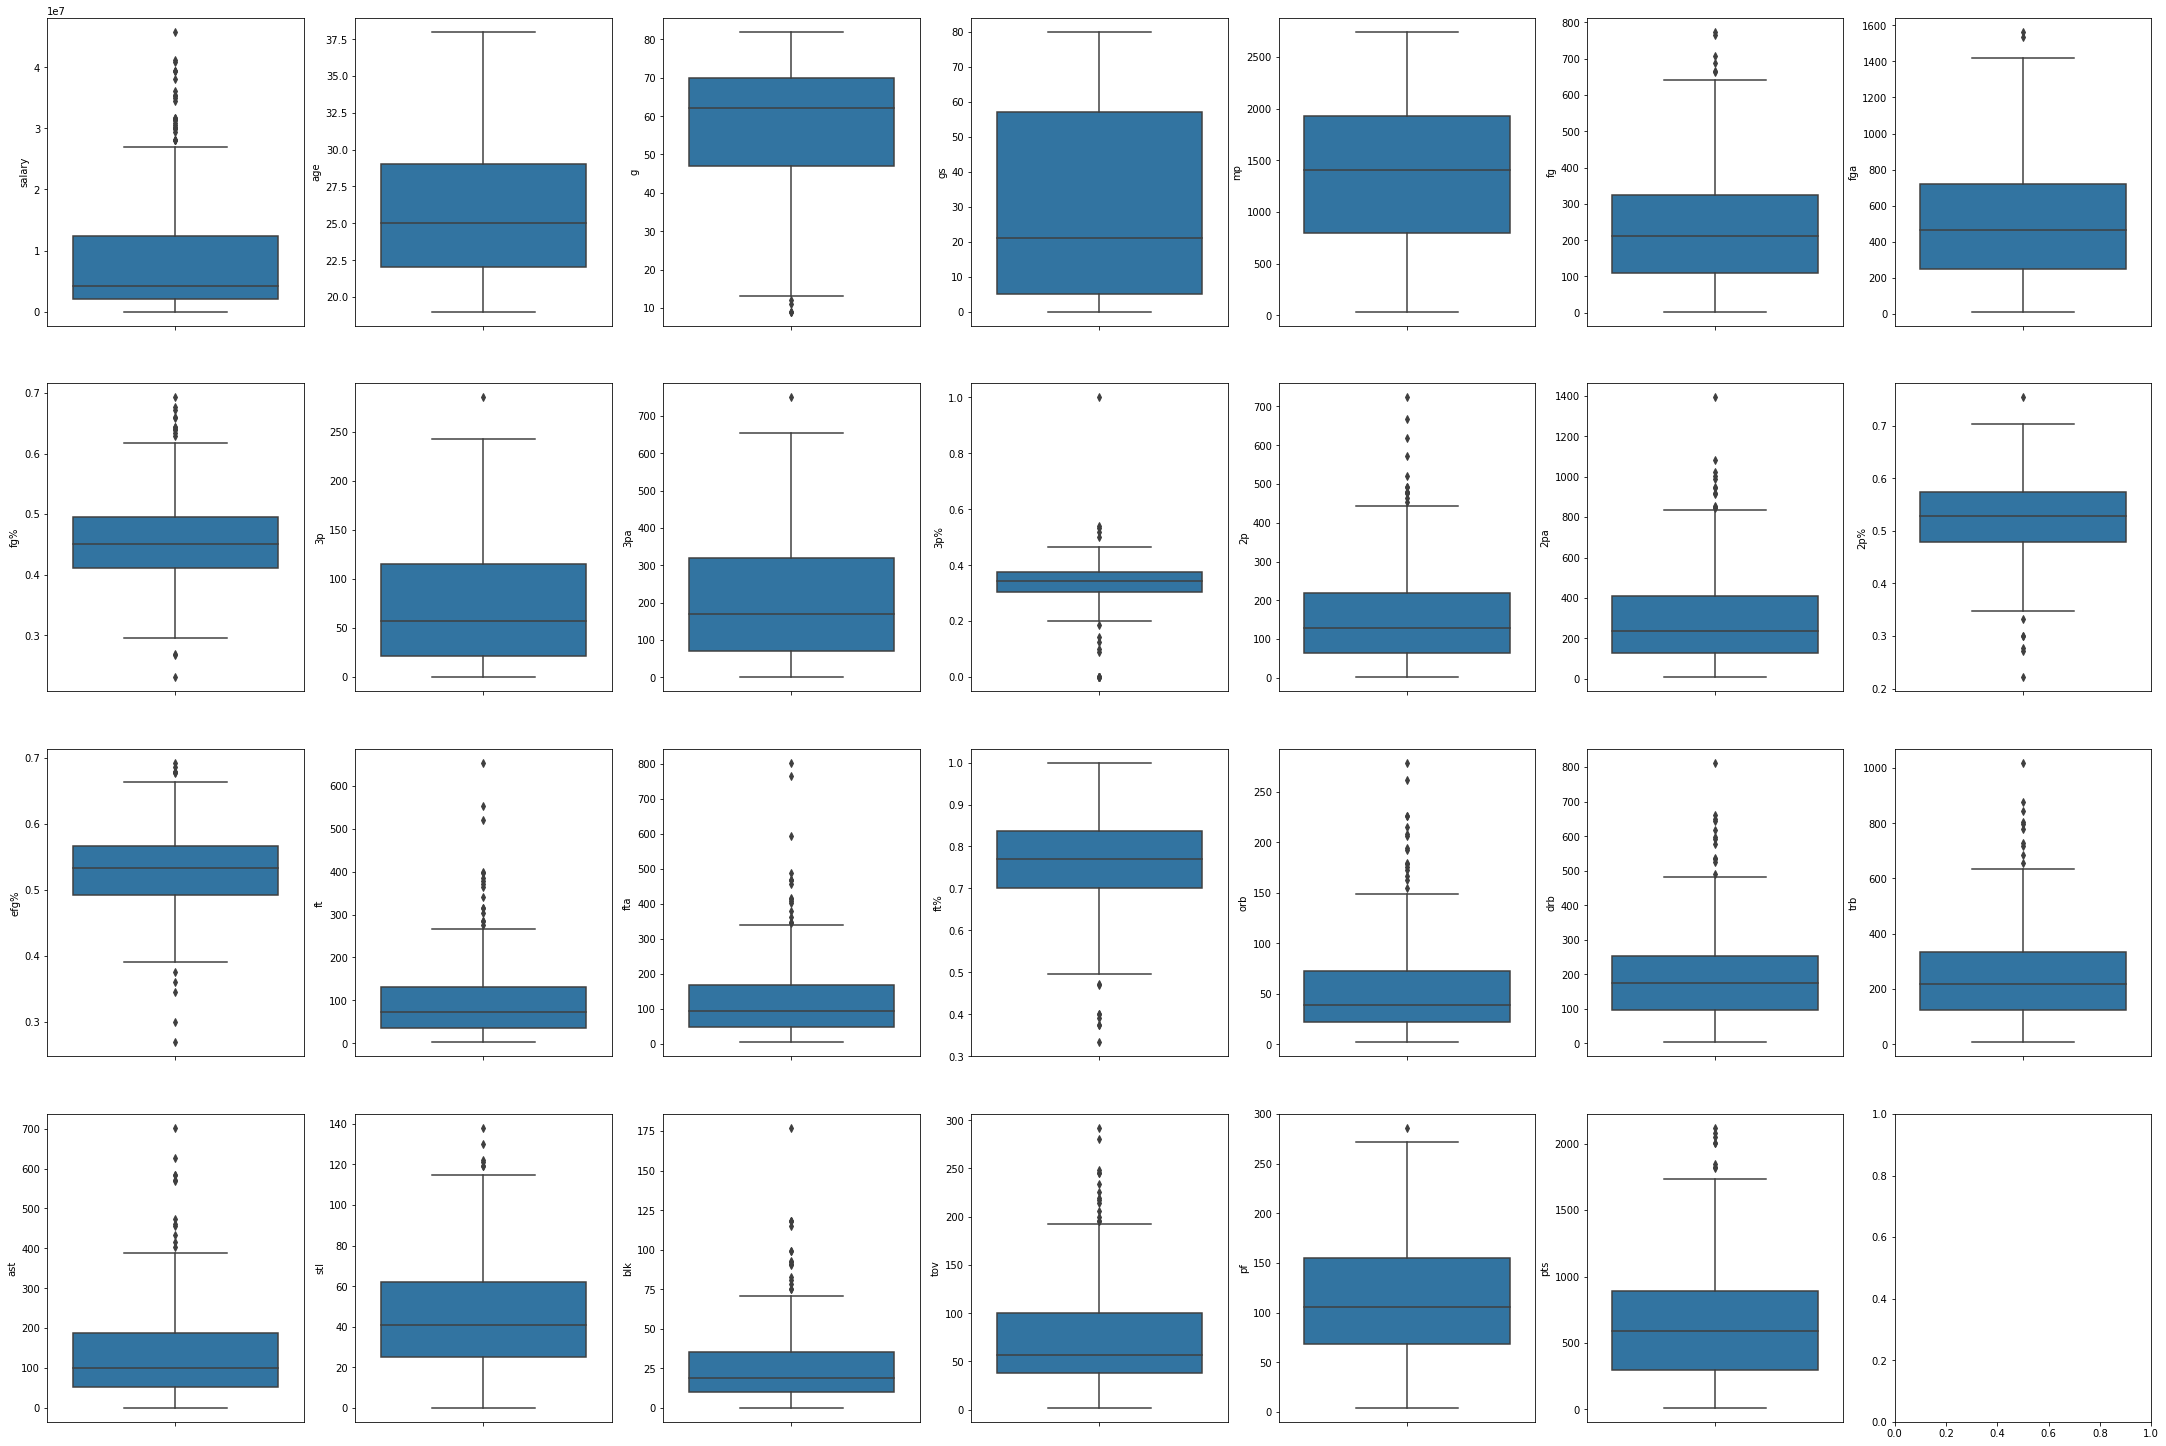

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20)) #Create a figure with 7 columns and 4 rows
index = 0
axs = axs.flatten() #
for k,v in nba_data_numeric.items(): #Loop through the columns
    sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index]) #plot the data
    index += 1 #Increment the index
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0) #Adjust the spacing between the plots